## 0. load packages

In [44]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta,tzinfo
import sqlite3

## 1. load data

In [45]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect("data/database.sqlite")
# Load the data into a DataFrame
tweets_sql = pd.read_sql_query("SELECT * FROM Tweets", con)
# close connection
#Be sure to close the connection.
con.close()

In [46]:
print tweets_sql.shape
tweets_sql.head()

(14485, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to ...,,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,,nesi_1992,,0,@JetBlue is REALLY getting on my nerves !! 😡�...,,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.346,United,,CPoutloud,,0,@united yes. We waited in line for almost an h...,,2015-02-16 23:48:48 -0800,"Washington, DC",
3,567592368451248130,negative,1.0,Late Flight,1,United,,brenduch,,0,@united the we got into the gate at IAH on tim...,,2015-02-16 23:52:20 -0800,,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,,VahidESQ,,0,@SouthwestAir its cool that my bags take a bit...,,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [47]:
tweets = pd.read_csv('data/Tweets.csv')
print tweets.shape
tweets.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## 2. Exploratory analysis

In [48]:
# Check if the two data sets are different or similar, as this is not clear for me from the kaggle description (https://www.kaggle.com/crowdflower/twitter-airline-sentiment):
print tweets.tweet_id.unique().shape
print tweets_sql.tweet_id.unique().shape

(14485L,)
(14485L,)


Seems like they are the same, as they have a similar number of unique tweets in the data set. Let's find out what the CSV file holds extra!?

In [49]:
dupl = tweets[tweets.tweet_id.duplicated(keep = False)]
print dupl.shape
print dupl[dupl.text.duplicated(keep = False)].shape
dupl.head()

(310, 15)
(310, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
11880,570308064185880577,neutral,0.6667,NaN,NaN,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangem...,NaN,2015-02-24 11:43:32 -0800,NaN,NaN
11881,570307949614256128,negative,0.6316,Bad Flight,0.3164,American,NaN,ELLLORRAC,NaN,0,@AmericanAir thanks for getting back to me. Bu...,NaN,2015-02-24 11:43:05 -0800,NaN,Central Time (US & Canada)
11882,570307948171423745,negative,0.6846,Flight Booking Problems,0.6846,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I pay $200 to reactivat...,NaN,2015-02-24 11:43:05 -0800,NaN,Quito
11883,570307434113310720,negative,0.6547,Late Flight,0.3331,American,NaN,LauraMolito,NaN,0,"@AmericanAir stranded for 24 hours in MIA, Pat...",NaN,2015-02-24 11:41:02 -0800,"New York, NY",Atlantic Time (Canada)


In [50]:
# examples
dupl[dupl.tweet_id == 570308309682675712]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito


In [51]:
dupl[dupl.tweet_id == 570308064185880577]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11880,570308064185880577,neutral,0.6667,NaN,NaN,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangem...,NaN,2015-02-24 11:43:32 -0800,NaN,NaN
12041,570308064185880577,neutral,0.6755,NaN,0.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangem...,NaN,2015-02-24 11:43:32 -0800,NaN,NaN


In [52]:
dupl[dupl.tweet_id == 570307434113310720]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11883,570307434113310720,negative,0.6547,Late Flight,0.3331,American,NaN,LauraMolito,NaN,0,"@AmericanAir stranded for 24 hours in MIA, Pat...",NaN,2015-02-24 11:41:02 -0800,"New York, NY",Atlantic Time (Canada)
12044,570307434113310720,negative,1.0000,Late Flight,1.0000,American,NaN,LauraMolito,NaN,0,"@AmericanAir stranded for 24 hours in MIA, Pat...",NaN,2015-02-24 11:41:02 -0800,"New York, NY",Atlantic Time (Canada)


There are 155 duplicates in the tweets.csv data set, meaning that the exact same tweet is taken more than once. Sometimes the row is completely equal comparing a duplicate, sometimes the airline sentiment confidence values differ. What might have happened is that, the duplicates where labeled by two different people and hence got into the data set as the different data points.

I will proceed with the SQL data set, as it has all unique data points and hence only one label per data point.

In [143]:
df = tweets_sql

In [144]:
df[['airline_sentiment_' + string for string in df.airline_sentiment.unique()]] = pd.get_dummies(df.airline_sentiment)

In [146]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment_neutral,airline_sentiment_negative,airline_sentiment_positive
0,567588278875213824,neutral,1.0,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to ...,,2015-02-16 23:36:05 -0800,USA,Sydney,0,1,0
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,,nesi_1992,,0,@JetBlue is REALLY getting on my nerves !! 😡�...,,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada),1,0,0
2,567591480085463040,negative,1.0,Late Flight,0.346,United,,CPoutloud,,0,@united yes. We waited in line for almost an h...,,2015-02-16 23:48:48 -0800,"Washington, DC",,1,0,0
3,567592368451248130,negative,1.0,Late Flight,1,United,,brenduch,,0,@united the we got into the gate at IAH on tim...,,2015-02-16 23:52:20 -0800,,Buenos Aires,1,0,0
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,,VahidESQ,,0,@SouthwestAir its cool that my bags take a bit...,,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada),1,0,0


<IPython.core.display.Javascript object>


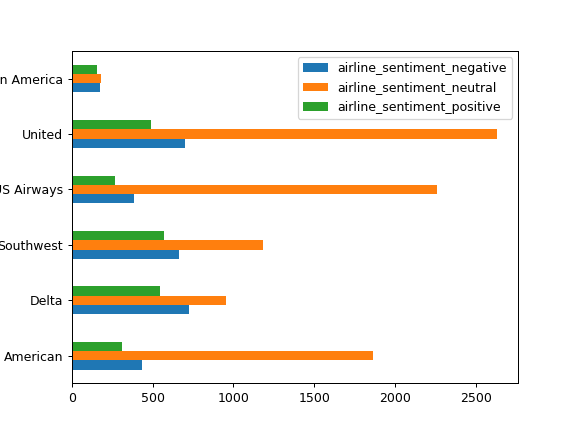

In [147]:
% matplotlib notebook
airline_sentiments = df.groupby('airline').sum().reset_index()
airline_sentiments[['airline','airline_sentiment_negative','airline_sentiment_neutral','airline_sentiment_positive']].plot(x = 'airline',kind = 'barh')

## 3. Feature creation & engineering:

### 3.1 creating the labels

In [148]:
y_label_mapper = {'negative': 0, 'positive': 1, 'neutral': 2}

y = df.airline_sentiment.map(y_label_mapper)

In [149]:
X = df[['tweet_id','airline_sentiment_confidence', 'airline','name','retweet_count', 'text','tweet_coord','tweet_created', 'tweet_location','user_timezone']]

### 3.2 creating date and time features (day, weekday, hour, time of the day in that timezone)

In [150]:
class FixedOffset(tzinfo):
    """Fixed offset in minutes: `time = utc_time + utc_offset`."""
    def __init__(self, offset):
        self.__offset = timedelta(seconds=offset)
        hours, minutes = divmod(offset, 60)
        #NOTE: the last part is to remind about deprecated POSIX GMT+h timezones
        #  that have the opposite sign in the name;
        #  the corresponding numeric value is not used e.g., no minutes
        self.__name = '<%+03d%02d>%+d' % (hours, minutes, -hours)
    def utcoffset(self, dt=None):
        return self.__offset
    def tzname(self, dt=None):
        return self.__name
    def dst(self, dt=None):
        return timedelta(0)
    def __repr__(self):
        return 'FixedOffset(%d)' % (self.utcoffset().total_seconds() / 60)
    
def string_to_datetime_with_TimeZoneCorrection(string):
    # function translate the string to the respective LOCALTIME. 
    # it creates the initial datetime object PLUS adds/substracts the timezone shift.
    # the timezone of the string is UTC. The additional hours are added. This step is tidious with
    # the datetime library, which is why in forums it is suggested to deal with it yourself. Python 3.2+
    # apparently handles it itself.
    # with https://stackoverflow.com/questions/1101508/how-to-parse-dates-with-0400-timezone-string-in-python
    naive_date_str, _, offset_str = string.rpartition(' ')
    naive_dt = datetime.strptime(naive_date_str, '%Y-%m-%d %H:%M:%S')
    offset = int(offset_str[-4:-2])*60 + int(offset_str[-2:])
    if offset_str[0] == "-":
        offset = -offset
    dt = naive_dt.replace(tzinfo=FixedOffset(offset))
    return dt + timedelta(hours = dt.tzinfo.utcoffset().total_seconds() / 60)

def get_datetime_feature(datetime_object,feature_string):
    if feature_string == 'year':
        return datetime_object.year
    elif feature_string == 'month':
        return datetime_object.month
    elif feature_string == 'day':
        return datetime_object.day
    elif feature_string == 'hour':
        return datetime_object.hour
    elif feature_string == 'minute':
        return datetime_object.minute
    elif feature_string == 'second':
        return datetime_object.second
    
def get_time_of_the_day(hour):
    if (hour >= 6) & (hour < 12):
        return 1 # for morning
    elif (hour >= 12) & (hour < 18):
        return 2 # for afternoon
    elif (hour >= 18) & (hour < 22):
        return 3 # for evening
    elif (hour >= 22) | (hour < 6):
        return 4 # for night

In [151]:
X['tweet_created_TZC'] = X['tweet_created'].map(string_to_datetime_with_TimeZoneCorrection)
X['day']= X['tweet_created_TZC'].map(lambda x: get_datetime_feature(x,'day'))
X['hour']= X['tweet_created_TZC'].map(lambda x: get_datetime_feature(x,'hour'))
X['daytime'] = X['hour'].map(get_time_of_the_day)
X = X.drop(['tweet_created_TZC','tweet_created'], 1)

C:\Users\benja\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\benja\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\benja\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [152]:
X.head()

,tweet_id,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_coord,tweet_location,user_timezone,day,hour,daytime
0,567588278875213824,1.0,Delta,JetBlueNews,0,@JetBlue's new CEO seeks the right balance to ...,,USA,Sydney,16,15,2
1,567590027375702016,1.0,Delta,nesi_1992,0,@JetBlue is REALLY getting on my nerves !! 😡�...,,undecided,Pacific Time (US & Canada),16,15,2
2,567591480085463040,1.0,United,CPoutloud,0,@united yes. We waited in line for almost an h...,,"Washington, DC",,16,15,2
3,567592368451248130,1.0,United,brenduch,0,@united the we got into the gate at IAH on tim...,,,Buenos Aires,16,15,2
4,567594449874587648,1.0,Southwest,VahidESQ,0,@SouthwestAir its cool that my bags take a bit...,,"Los Angeles, CA",Pacific Time (US & Canada),16,16,2


### 3.3 airline, name, tweet_location, user_timezone - one hot encoding

In [153]:
# check for NaN or empty entries
# one hot encode the airline
print "%s rows have missing values (NaN in numeric arrays, None/NaN in object arrays)" % X.airline.isnull().sum()

X = pd.concat([X,pd.get_dummies(X[['airline','name','tweet_location','user_timezone']], prefix=['airline','name','location','timezone'],prefix_sep='_')], axis=1)
X = X.drop(['airline','name','tweet_location','user_timezone','tweet_coord'], 1)

X.head()

0 rows have missing values (NaN in numeric arrays, None/NaN in object arrays)


,tweet_id,airline_sentiment_confidence,retweet_count,text,day,hour,daytime,airline_American,airline_Delta,airline_Southwest,...,timezone_Stockholm,timezone_Sydney,timezone_Taipei,timezone_Tehran,timezone_Tijuana,timezone_Tokyo,timezone_Vienna,timezone_Warsaw,timezone_Wellington,timezone_West Central Africa
0,567588278875213824,1.0,0,@JetBlue's new CEO seeks the right balance to ...,16,15,2,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,567590027375702016,1.0,0,@JetBlue is REALLY getting on my nerves !! 😡�...,16,15,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,567591480085463040,1.0,0,@united yes. We waited in line for almost an h...,16,15,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,567592368451248130,1.0,0,@united the we got into the gate at IAH on tim...,16,15,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,567594449874587648,1.0,0,@SouthwestAir its cool that my bags take a bit...,16,16,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 3.4 NLP with tweet text

In [154]:
# make a simple clean of all @..., the webpages, stopwords, remove hashtags and all other shit, all the other magic,
# then do word counting
# try randomforest or XGBoost
# try ngrams after cleaning
# play with more algorithms
for i in range(10):
    print X.text[i]

@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch
@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy
@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.
@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait
@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.
@united and don't hope for me having a nicer flight some other time, try to do things right. You sold me those tickets with that connetion
@united I like delays less than you because I'm the one on the plane. Connect me with a voucher
@united, link to current status of flights/airports? Fly BWI-EWR-MCO this morning yet can't yet tell what any problems are except see snow.
@SouthwestAir you guys there? Are we on hour

In [155]:
import preprocessor as p
p.set_options(p.OPT.MENTION,p.OPT.URL)

def clean_tweet(tweet):
    return p.clean(tweet)

X['tweet_clean'] = X['text'].map(clean_tweet)

In [156]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from spacy.en.language_data import STOP_WORDS
from spacy.en import English
nlp = English()

def tokenize_lemma(text):
    return [w.lemma_ for w in nlp(text)]

#counter = CountVectorizer(lowercase=True,
#                          ngram_range=(1,2),
#                          stop_words=STOP_WORDS.union(df.airline.unique()),
#                          tokenizer=tokenize_lemma)
tfidf_vec = TfidfVectorizer(lowercase=True,
                            ngram_range=(1,2),
                            stop_words=STOP_WORDS.union(df.airline.unique()),
                            tokenizer=tokenize_lemma)
tweets_tfidf_vec_1gram_2gram_stopwords_stemming = pd.DataFrame(tfidf_vec.fit_transform(X.tweet_clean).toarray())

In [157]:
X = pd.concat([X,tweets_tfidf_vec_1gram_2gram_stopwords_stemming], axis=1)
X = X.drop(['tweet_id','text','tweet_clean'], 1)
X.head()

,airline_sentiment_confidence,retweet_count,day,hour,daytime,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0,16,15,2,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0,16,15,2,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,16,15,2,0,0,0,0,1,...,0.000000,0.000000,0.181344,0.181821,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0,16,15,2,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0,16,16,2,0,0,1,0,0,...,0.070943,0.070954,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Algorithm training

### 4.1 Creating training and test set

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 4.2 Training simple models with default settings
#### 4.2.1 default random forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = RFC.predict(X_test)
accuracy_score(y_test,y_pred)

0.65341978665551137

#### 4.2.2 default logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
LOG = LogisticRegression()
LOG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = LOG.predict(X_test)
print accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

0.666178623719


array([[2788,   32,  145],
       [ 547,   69,  151],
       [ 656,   65,  328]], dtype=int64)

#### 4.2.3 default XGBoost

In [177]:
# the locations need to be looked at with more detail, as there seem to be multiple kinds of writings of the same place.

colnames = [col for col in X]

for i,col in enumerate(colnames):
    try:
        if (' ' in col):
            colnames[i] = col.replace(' ', '_')
        elif ('|' in col):
            colnames[i] = col.replace('|', '_')
        elif ('[' in col):
            colnames[i] = col.replace('[', '_')
        elif (']' in col):
            colnames[i] = col.replace(']', '_')
        elif (',' in col):
            colnames[i] = col.replace(',', '_')
        elif (', ' in col):
            colnames[i] = col.replace(', ', '_')
        elif ('<' in col):
            colnames[i] = col.replace('<', '_')
    except:
        pass
    
X.columns =colnames

for i,ele in enumerate(colnames):
    if ele in colnames[i+1:]:
        print i,ele

In [180]:
# for the default XGBoost model, I will ignore the multiple column names for now:
X.columns = range(X.shape[1])

from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [181]:
y_pred = XGB.predict(X_test)
print accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

0.668270236352


array([[2773,   40,  152],
       [ 517,   94,  156],
       [ 643,   78,  328]], dtype=int64)

### 4.3 learning with GridSearch
#### 4.3.1 RandomForest

In [ ]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# build a classifier
RFC = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"n_estimators": [3,10,30,100,300,1000],
              "max_depth": [3, 5, 7, None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(RFC, param_distributions=param_dist,
                                   n_iter=n_iter_search,n_jobs = -1)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"n_estimators": [3,10,30,100,300,1000],
              "max_depth": [3, 5, 7, None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(RFC, param_grid=param_grid, n_jobs = -1)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 371.11 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.635 (std: 0.008)
Parameters: {'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 300, 'criterion': 'entropy', 'min_samples_split': 10, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.631 (std: 0.005)
Parameters: {'bootstrap': False, 'min_samples_leaf': 5, 'n_estimators': 10, 'criterion': 'gini', 'min_samples_split': 3, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.631 (std: 0.005)
Parameters: {'bootstrap': True, 'min_samples_leaf': 5, 'n_estimators': 3, 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': None}

